<a href="https://colab.research.google.com/github/mwele/applied_ai_code/blob/master/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
iris=datasets.load_iris()
iris_X=iris.data
y=iris.target

In [5]:
from sklearn import  decomposition
pca=decomposition.PCA()
pca

PCA()

In [6]:
iris_pca=pca.fit_transform(iris_X)


In [9]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

PCA has a general mathematical definition and a specific use case in data analysis. PCA
finds the set of orthogonal directions that represent the original data matrix.
Generally, PCA works by mapping the original dataset into a new space where each of the
new column vectors of the matrix are orthogonal. From a data analysis perspective, PCA
transforms the covariance matrix of the data into column vectors that can explain certain
percentages of the variance. For example, with the iris dataset, 92.5 percent of the variance
of the overall dataset can be explained by the first component.* **bold text***bold text**

In [12]:
pca=decomposition.PCA(n_components=2)
pca_iris_prime=pca.fit_transform(iris_X)
pca_iris_prime.shape

(150, 2)

Our data matrix is now 150 x 2, instead of 150 x 4. The separability of the classes remains
even after reducing the dimensionality by two. We can see how much of the variance is
represented by the two components that remain:

In [13]:
pca.explained_variance_ratio_.sum()

0.977685206318795

Text(0.5, 1.0, 'After PCA')

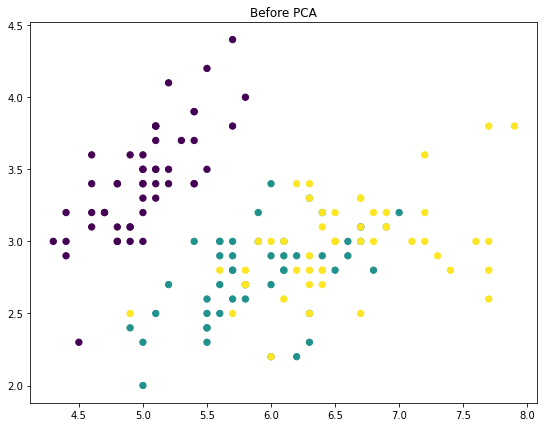

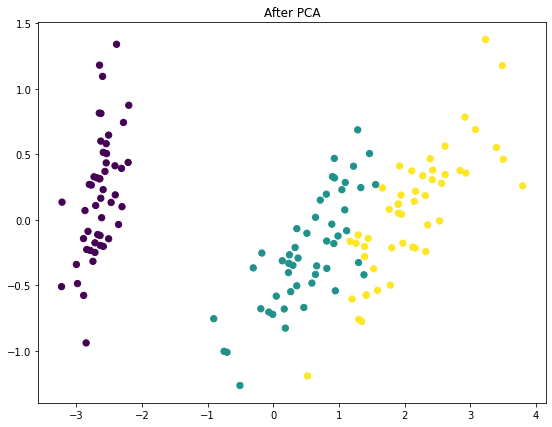

In [19]:
fig=plt.figure(figsize=(20,7))
ax=fig.add_subplot(121)
ax.scatter(iris_X[:,0],iris_X[:,1],c=y,s=40)
ax.set_title('Before PCA')

fig=plt.figure(figsize=(20,7))
ax=fig.add_subplot(122)
ax.scatter(pca_iris_prime[:,0],pca_iris_prime[:,1],c=y,s=40)
ax.set_title('After PCA')

The PCA object can also be created with the amount of explained variance in mind from the
start. For example, if we want to be able to explain at least 98 percent of the variance, the
PCA object will be created as follows:

In [20]:
pca=decomposition.PCA(n_components=0.98)
iris_pca_object_data_prime=pca.fit(iris_X).transform(iris_X)
pca.explained_variance_ratio_.sum()


0.9947878161267247

Even though the final dimensions of the data are two or three, these two or
three columns contain information from all four original columns.

In [21]:
from sklearn import preprocessing
iris_x_scaled=preprocessing.scale(iris_X)
iris_x_scaled_pca=pca.fit_transform(iris_x_scaled)
pca.explained_variance_ratio_.sum()

0.9948212908928452

Text(0.5, 1.0, 'Scaling followed by PCA')

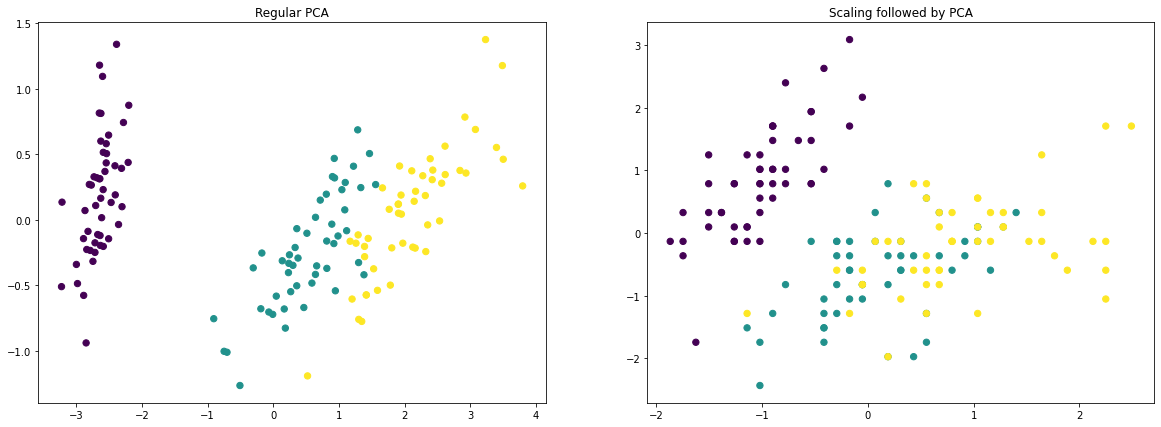

In [23]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(pca_iris_prime[:,0],pca_iris_prime[:,1],c=y,s=40)
ax.set_title('Regular PCA')
ax2 = fig.add_subplot(122)
ax2.scatter(iris_x_scaled[:,0],iris_x_scaled[:,1],c=y,s=40)
ax2.set_title('Scaling followed by PCA')

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_X = iris.data
y = iris.target

In [51]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap
import matplotlib.pyplot as plt
iris_pca = PCA(n_components = 2).fit_transform(iris_X)
iris_tsne = TSNE(learning_rate=2000, perplexity=30).fit_transform(iris_X)
iris_MDS = MDS(n_components = 2).fit_transform(iris_X)
iris_ISO = Isomap(n_components = 2).fit_transform(iris_X)
iris_tsne_2=TSNE(learning_rate=2000,perplexity=30).fit_transform(iris_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'ISO')

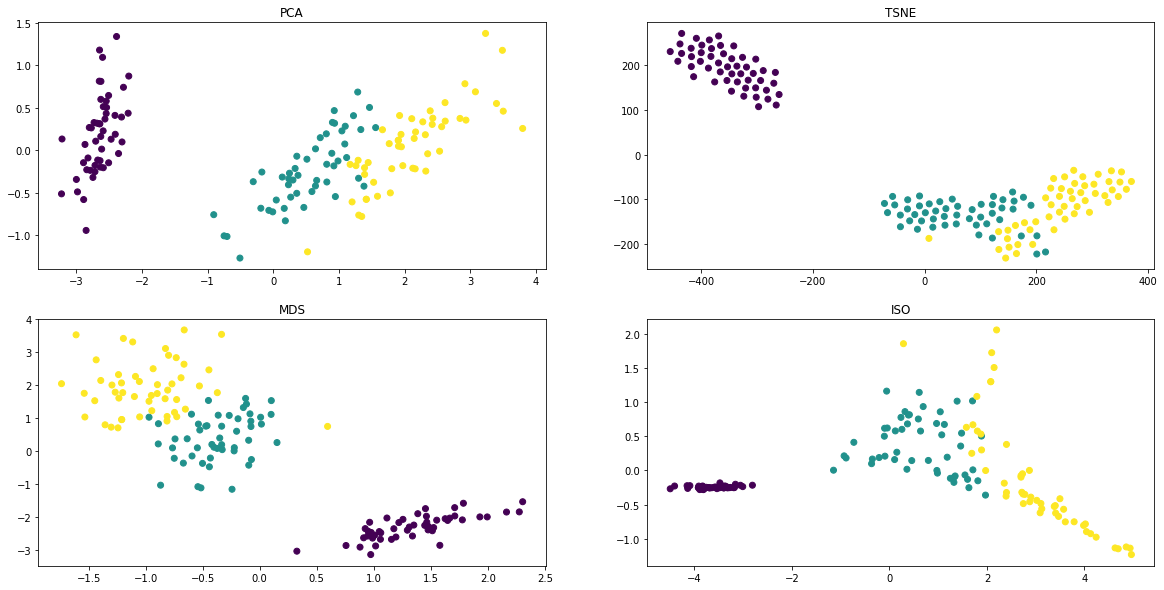

In [53]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('PCA')
plt.scatter(iris_pca [:, 0], iris_pca [:, 1], c=y)
plt.subplot(222)
plt.scatter(iris_tsne[:, 0], iris_tsne[:, 1], c=y)
plt.title('TSNE')
plt.subplot(223)
plt.scatter(iris_MDS[:, 0], iris_MDS[:, 1], c=y)
plt.title('MDS')
plt.subplot(224)
plt.scatter(iris_ISO[:, 0], iris_ISO[:, 1], c=y)
plt.title('ISO')


Text(0.5, 1.0, 'pca_then_tsne')

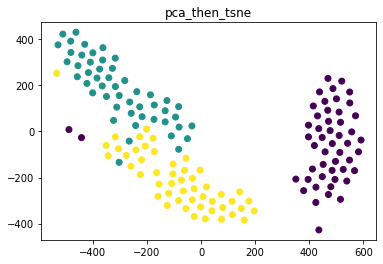

In [54]:

plt.scatter(iris_tsne_2[:, 0], iris_tsne_2[:, 1], c=y)
plt.title('pca_then_tsne')